In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [312]:
data = pd.read_csv("zomato.csv")
data.head(n=3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [313]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [314]:
data = data.drop(['url', 'phone', 'dish_liked', 'reviews_list', 'listed_in(city)'], axis = 1)
data.head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet


In [315]:
data.shape

(51717, 12)

In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  menu_item                    51717 non-null  object
 11  listed_in(type)              51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


In [317]:
data.duplicated().sum()

12477

In [318]:
data = data.drop_duplicates()
data

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",[],Pubs and bars
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",[],Pubs and bars
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",[],Pubs and bars


In [319]:
data['rate'].value_counts(dropna = False)

NaN       4196
3.9/5     1754
3.7/5     1607
3.8/5     1590
3.9 /5    1527
          ... 
2.0 /5       6
2.2 /5       5
2.0/5        4
1.8/5        1
1.8 /5       1
Name: rate, Length: 65, dtype: int64

In [320]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [321]:
data['rate'] = data['rate'].apply(lambda val: val if val not in ['NEW', '-'] else np.nan)
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [322]:
data['rate'] = [float(str(value).split('/')[0]) for value in data['rate']]
data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [323]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [324]:
data['approx_cost(for two people)'] = [float(str(value).replace(',','')) for value in data['approx_cost(for two people)']]
data['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [325]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [326]:
rest_types = data['rest_type'].value_counts(ascending=False)
# rest_types

In [327]:
rest_types_1000 = rest_type[rest_types<1000]
rest_types_1000

Dessert Parlor, Food Court      1
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Mess, Quick Bites               1
Pop Up                          1
                             ... 
Bar, Casual Dining            360
Food Court                    428
Bar                           481
Beverage Shop                 493
Bakery                        738
Name: rest_type, Length: 86, dtype: int64

In [328]:
data['rest_type'] = data['rest_type'].apply(lambda x: x if x not in rest_types_1000 else 'others')
data['rest_type'].value_counts()

Quick Bites           13815
Casual Dining          8389
others                 7931
Cafe                   2898
Delivery               1831
Dessert Parlor         1750
Takeaway, Delivery     1445
Casual Dining, Bar     1013
Name: rest_type, dtype: int64

In [329]:
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [330]:
location = data['location'].value_counts(ascending = False)
location

BTM                      3237
Whitefield               1999
HSR                      1971
Indiranagar              1928
Koramangala 5th Block    1857
                         ... 
Central Bangalore           5
Nagarbhavi                  4
Rajarajeshwari Nagar        2
Jakkur                      1
Peenya                      1
Name: location, Length: 93, dtype: int64

In [331]:
location_250 = location[location<1000]
location_250

Sarjapur Road            958
Brigade Road             848
Koramangala 7th Block    754
Koramangala 6th Block    726
Ulsoor                   690
                        ... 
Central Bangalore          5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: location, Length: 82, dtype: int64

In [332]:
cuisines = data['cuisines'].unique()
cuisines

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [333]:
cuisine = data['cuisines'].value_counts()
cuisine

North Indian                                       2147
North Indian, Chinese                              1753
South Indian                                       1270
Bakery, Desserts                                    664
Biryani                                             625
                                                   ... 
South Indian, North Indian, Coffee, Juices, Tea       1
Rajasthani, North Indian, Chinese                     1
Seafood, North Indian, Mangalorean                    1
Mediterranean, European, Healthy Food                 1
North Indian, Chinese, Arabian, Momos                 1
Name: cuisines, Length: 2723, dtype: int64

In [334]:
cuisine_100 = cuisines[cuisines<100]

TypeError: '<' not supported between instances of 'str' and 'int'

In [335]:
data['cuisines'] = data['cuisines'].apply(lambda x: x if x not in cuisines_lessthan100 else 'others')
data['cuisines'].value_counts()

others                                              22193
North Indian                                         2147
North Indian, Chinese                                1753
South Indian                                         1270
Bakery, Desserts                                      664
Biryani                                               625
Fast Food                                             575
South Indian, North Indian, Chinese                   545
Desserts                                              524
Cafe                                                  513
Bakery                                                436
Chinese                                               379
Ice Cream, Desserts                                   345
Mithai, Street Food                                   301
Chinese, North Indian                                 291
Desserts, Ice Cream                                   271
North Indian, Chinese, Biryani                        258
North Indian, 

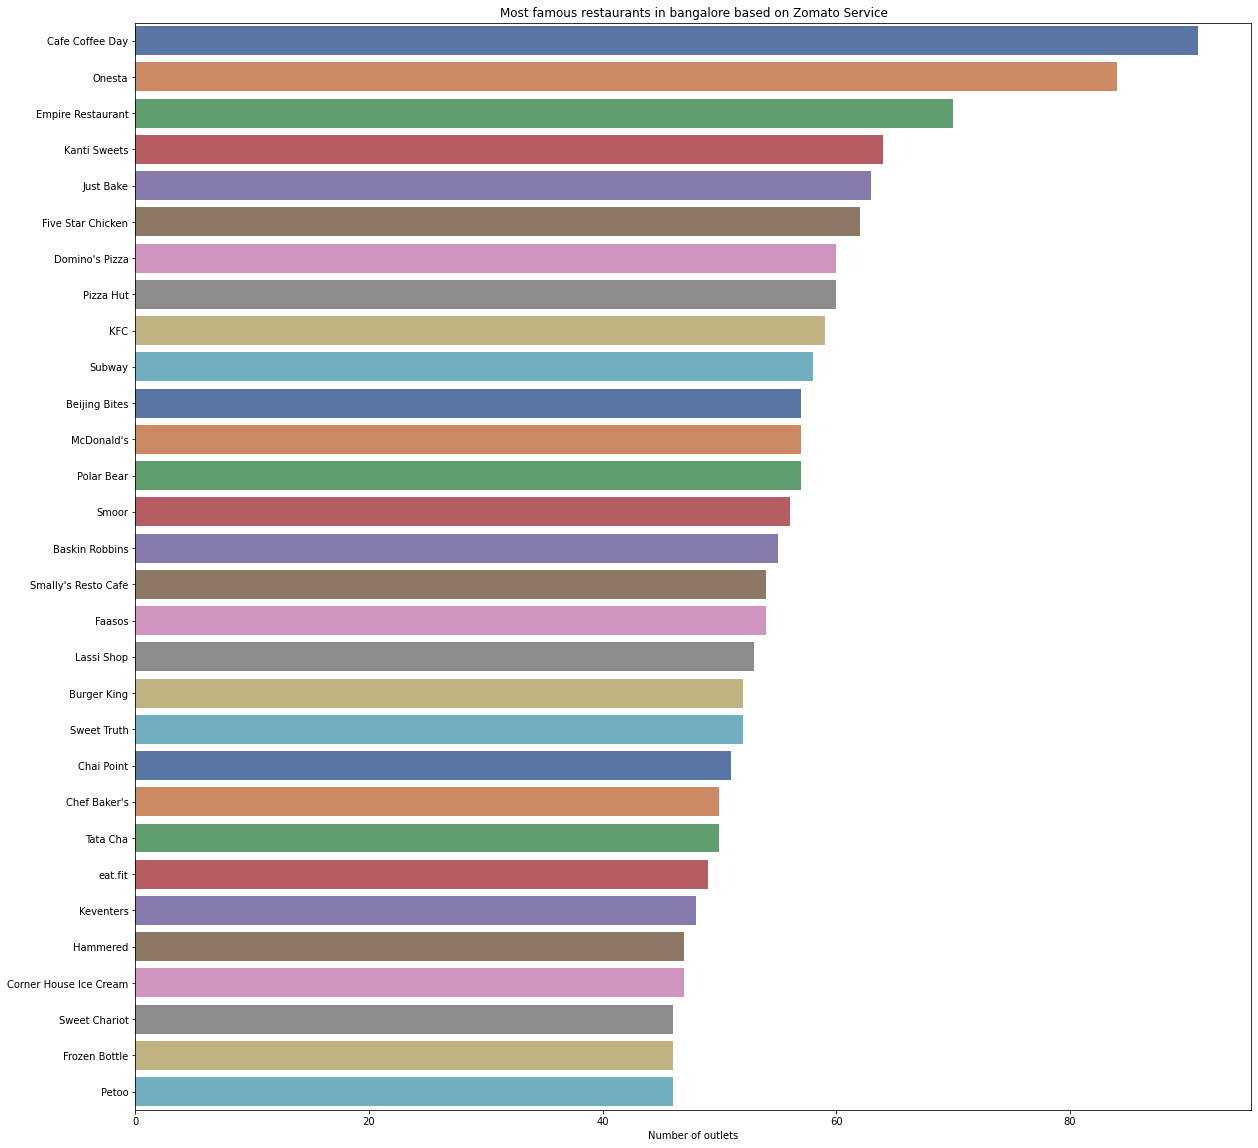

In [336]:
plt.figure(figsize= (20,20))
famous_resturent = data['name'].value_counts()[:30]
sns.barplot(x = famous_resturent, y=  famous_resturent.index,  palette= 'deep')
plt.title('Most famous restaurants in bangalore based on Zomato Service')
plt.xlabel('Number of outlets')
plt.show()

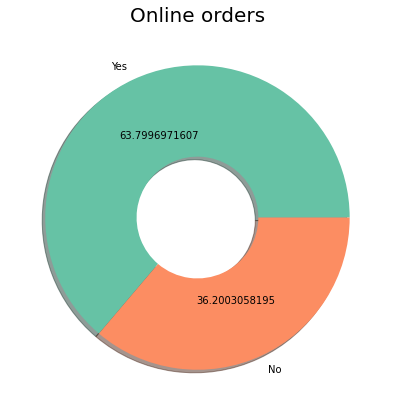

In [337]:
v = data['online_order'].value_counts()
fig = plt.gcf()
fig.set_size_inches((12,7))
cmap = plt.get_cmap('Set2')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.10f', shadow = True, colors=  color)
plt.title('Online orders', fontsize = 20)
plt.show()

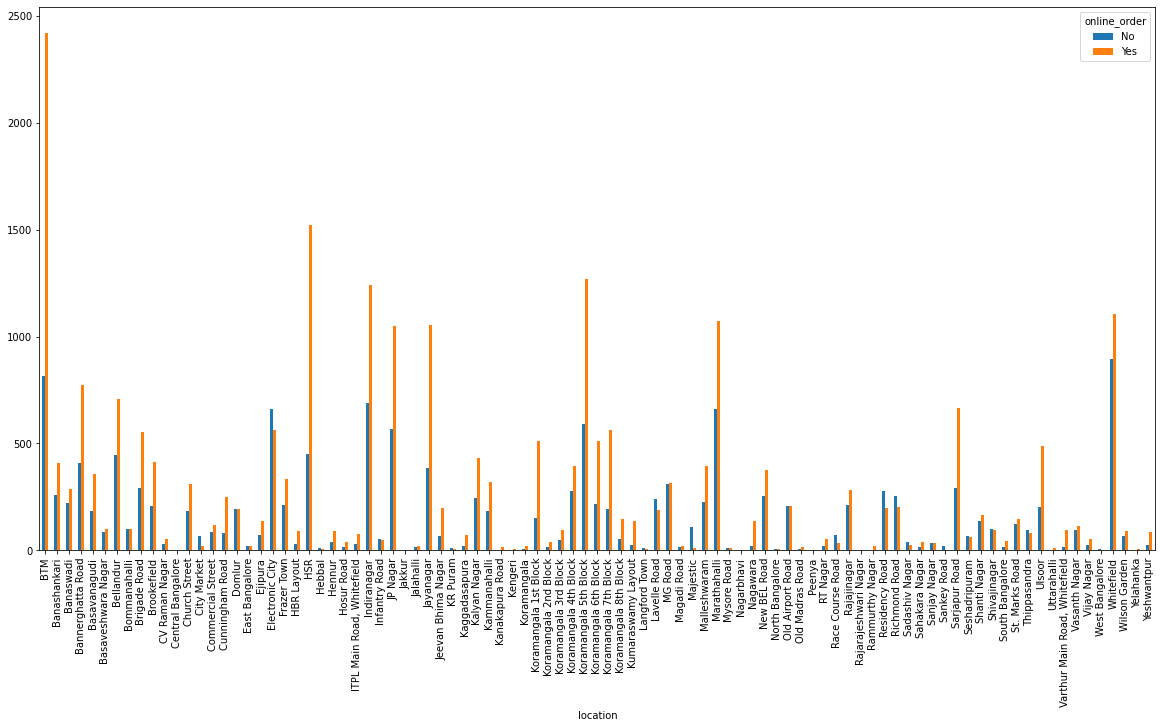

In [338]:
online_order_by_location = data.groupby(['location', 'online_order']).size().unstack('online_order', fill_value=0)
online_order_by_location.plot(kind='bar', figsize=(20, 10))
plt.show()

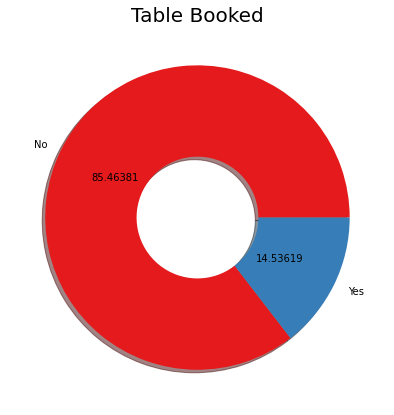

In [339]:
v = data['book_table'].value_counts()
fig = plt.gcf()
fig.set_size_inches((12,7))
cmap = plt.get_cmap('Set1')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.05f', shadow = True, colors=  color)
plt.title('Table Booked', fontsize = 20)
plt.show()

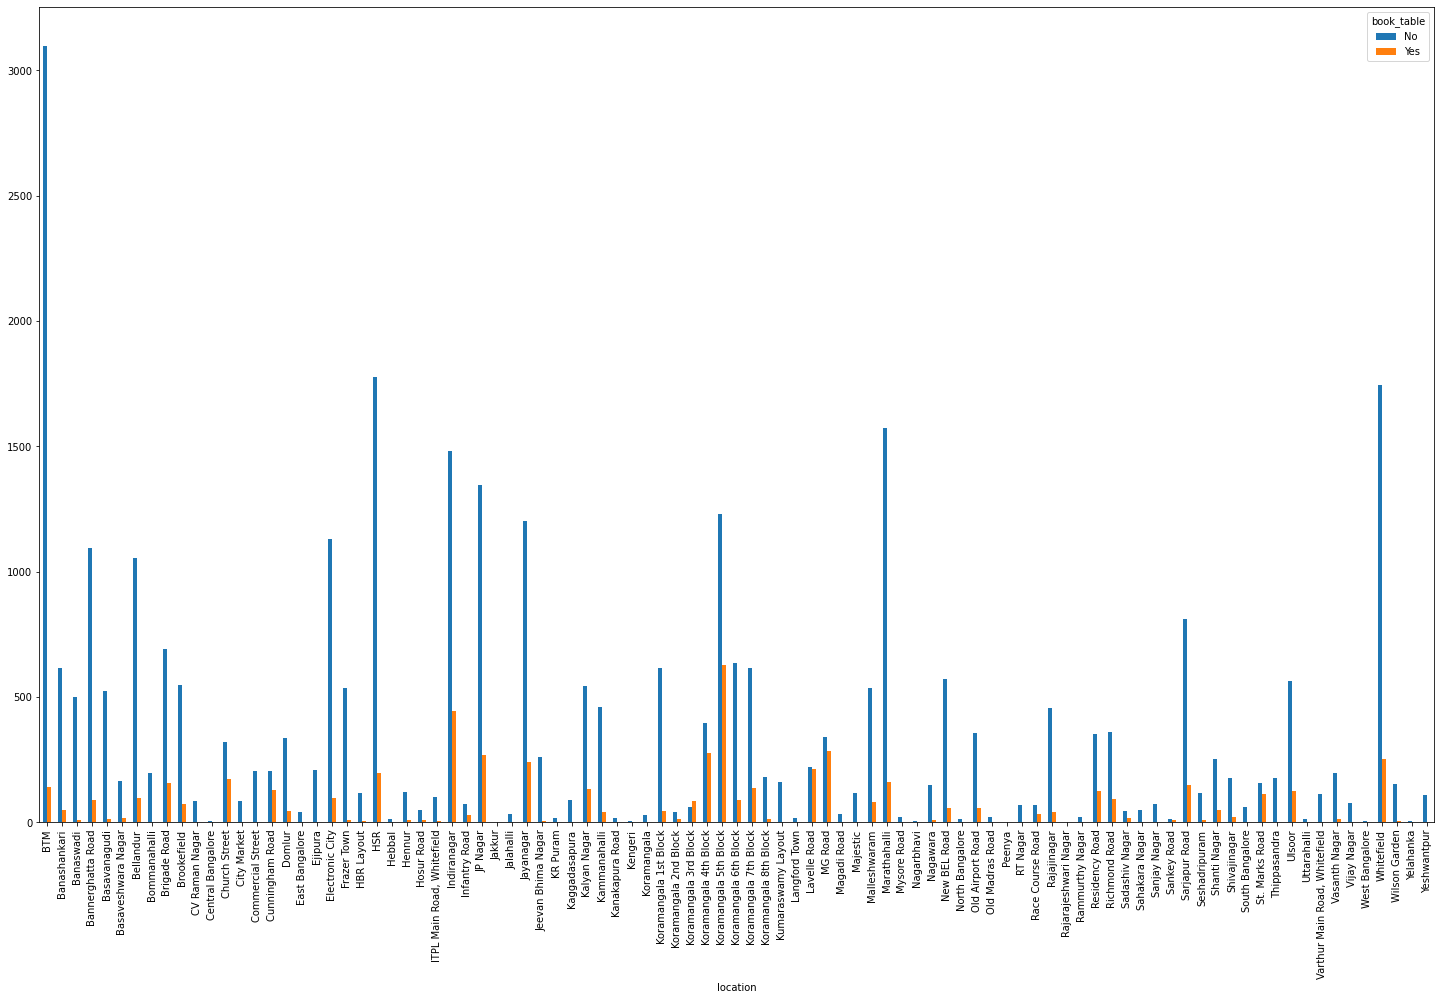

In [340]:
book_table_by_location = data.groupby(['location', 'book_table']).size().unstack('book_table', fill_value=0)
book_table_by_location.plot(kind='bar', figsize=(25, 15))
plt.show()

Text(0.5, 1.0, 'Rating Distribution')

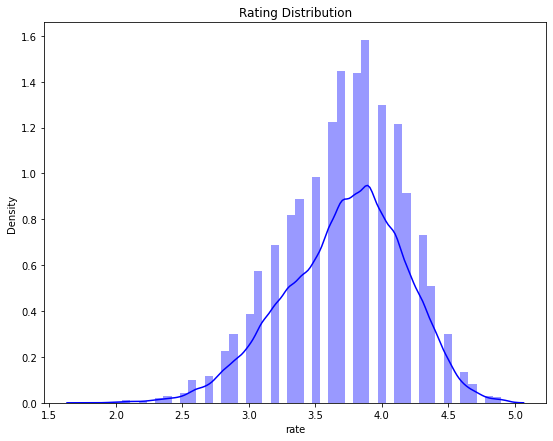

In [341]:
plt.figure(figsize = (9,7))
sns.distplot(data['rate'], color = 'b')
plt.title('Rating Distribution')

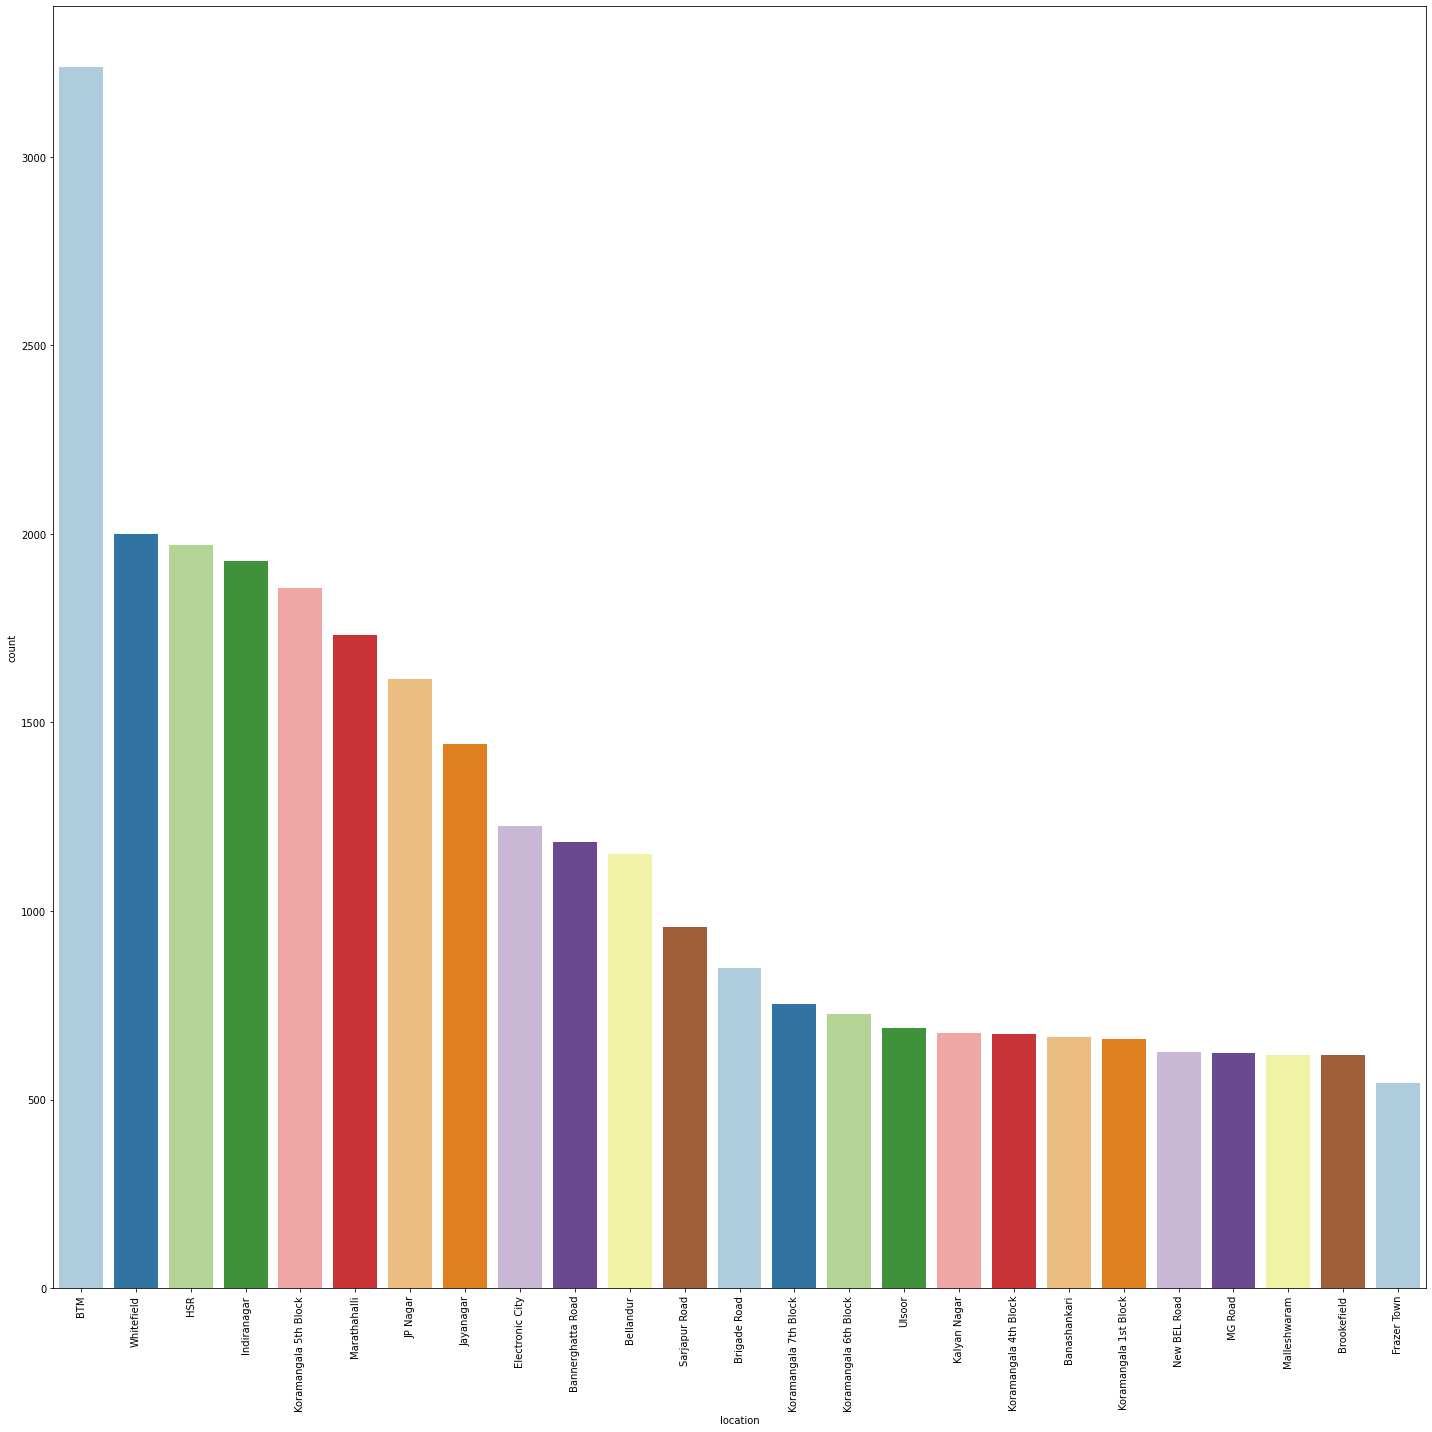

In [345]:
data = data[~data['location'].isnull()]
location_grp = data.groupby(['location']).agg(['count'])['name'].reset_index()
location_grp.sort_values(by="count", inplace=True, ascending=False)
fig = plt.figure(figsize = (20, 20))  
sns.barplot(x="location", y="count", data=location_grp[:25], palette='Paired')
plt.xticks(rotation=90)
plt.tight_layout()

In [346]:
from geopy.geocoders import Nominatim

i = 0

def findGeocode(city):
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:     
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="app_name") 
        loc = geolocator.geocode(city)
        return loc
    except GeocoderTimedOut:
        i += 1
        if i == 5:
            return None
        return findGeocode(city)    

In [347]:
data = data[data['location']!="Rammurthy Nagar"]

In [348]:
location_lat_long = {}
locations_unq = data.location.unique()
for loc in locations_unq:
    loc = loc + ", Bangalore"
    location = findGeocode(loc)
    if location is None:
        print("Not found.. ", loc)
        continue
    lat = location.latitude
    long = location.longitude
    location_lat_long[loc] = [lat, long]
    print("Saved.. ", loc)

Saved..  Banashankari, Bangalore
Saved..  Basavanagudi, Bangalore
Saved..  Mysore Road, Bangalore
Saved..  Jayanagar, Bangalore
Saved..  Kumaraswamy Layout, Bangalore
Saved..  Rajarajeshwari Nagar, Bangalore
Saved..  Vijay Nagar, Bangalore
Saved..  Uttarahalli, Bangalore
Saved..  JP Nagar, Bangalore
Saved..  South Bangalore, Bangalore
Saved..  City Market, Bangalore
Saved..  Nagarbhavi, Bangalore
Saved..  Bannerghatta Road, Bangalore
Saved..  BTM, Bangalore
Saved..  Kanakapura Road, Bangalore
Saved..  Bommanahalli, Bangalore
Saved..  CV Raman Nagar, Bangalore
Saved..  Electronic City, Bangalore
Saved..  HSR, Bangalore
Saved..  Marathahalli, Bangalore
Saved..  Sarjapur Road, Bangalore
Saved..  Wilson Garden, Bangalore
Saved..  Shanti Nagar, Bangalore
Saved..  Koramangala 5th Block, Bangalore
Saved..  Koramangala 8th Block, Bangalore
Saved..  Richmond Road, Bangalore
Saved..  Koramangala 7th Block, Bangalore
Saved..  Jalahalli, Bangalore
Saved..  Koramangala 4th Block, Bangalore
Saved.. 

NameError: name 'GeocoderTimedOut' is not defined

In [349]:
from tqdm import tqdm 
# Appending the data to dataframes
heatmap_data = []
for indx, row in tqdm(data.iterrows(), total=len(data)):
    if row['location']+", Bangalore" in location_lat_long:
        data.loc[indx, 'latitude'] = location_lat_long[row['location']+", Bangalore"][0]
        data.loc[indx, 'longitude'] = location_lat_long[row['location']+", Bangalore"][1]
        heatmap_data.append([location_lat_long[row['location']+", Bangalore"][0], location_lat_long[row['location']+", Bangalore"][1]])

100%|█████████████████████████████████████| 39203/39203 [00:08<00:00, 4670.44it/s]


In [350]:
import folium
bengaluru = folium.Map(location=[12.972442, 77.580643], tiles='openstreetmap', zoom_start=12.3)

# kolkata = folium.Map(location=[22.572645, 88.363892], tiles='openstreetmap', zoom_start=12.3)

In [351]:
from folium import plugins

plugins.HeatMap(heatmap_data).add_to(bengaluru)

In [352]:
bengaluru

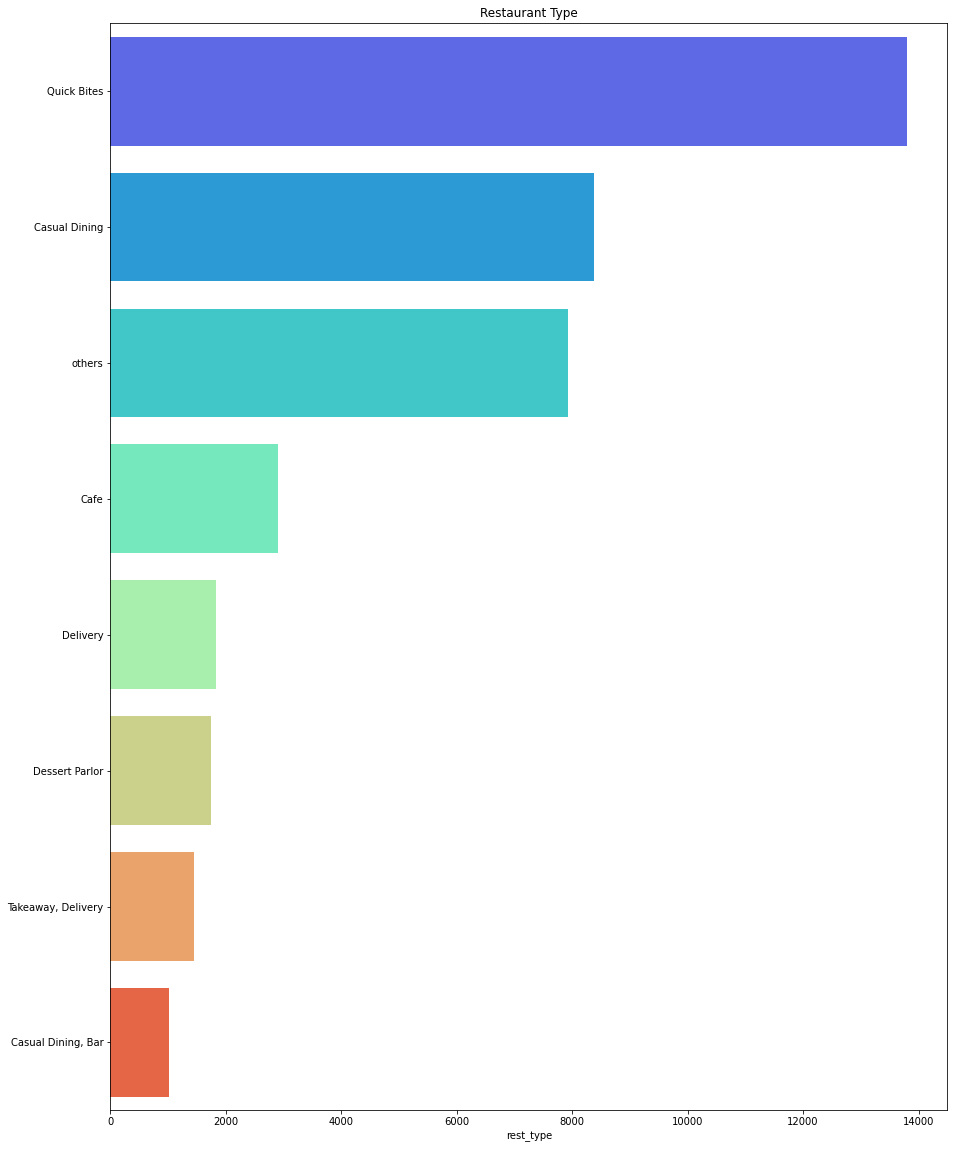

In [353]:
plt.figure(figsize = (15,20))
rest = data['rest_type'].value_counts()
sns.barplot(y = rest.index ,x = rest, palette = 'rainbow')
plt.title('Restaurant Type')
plt.show()

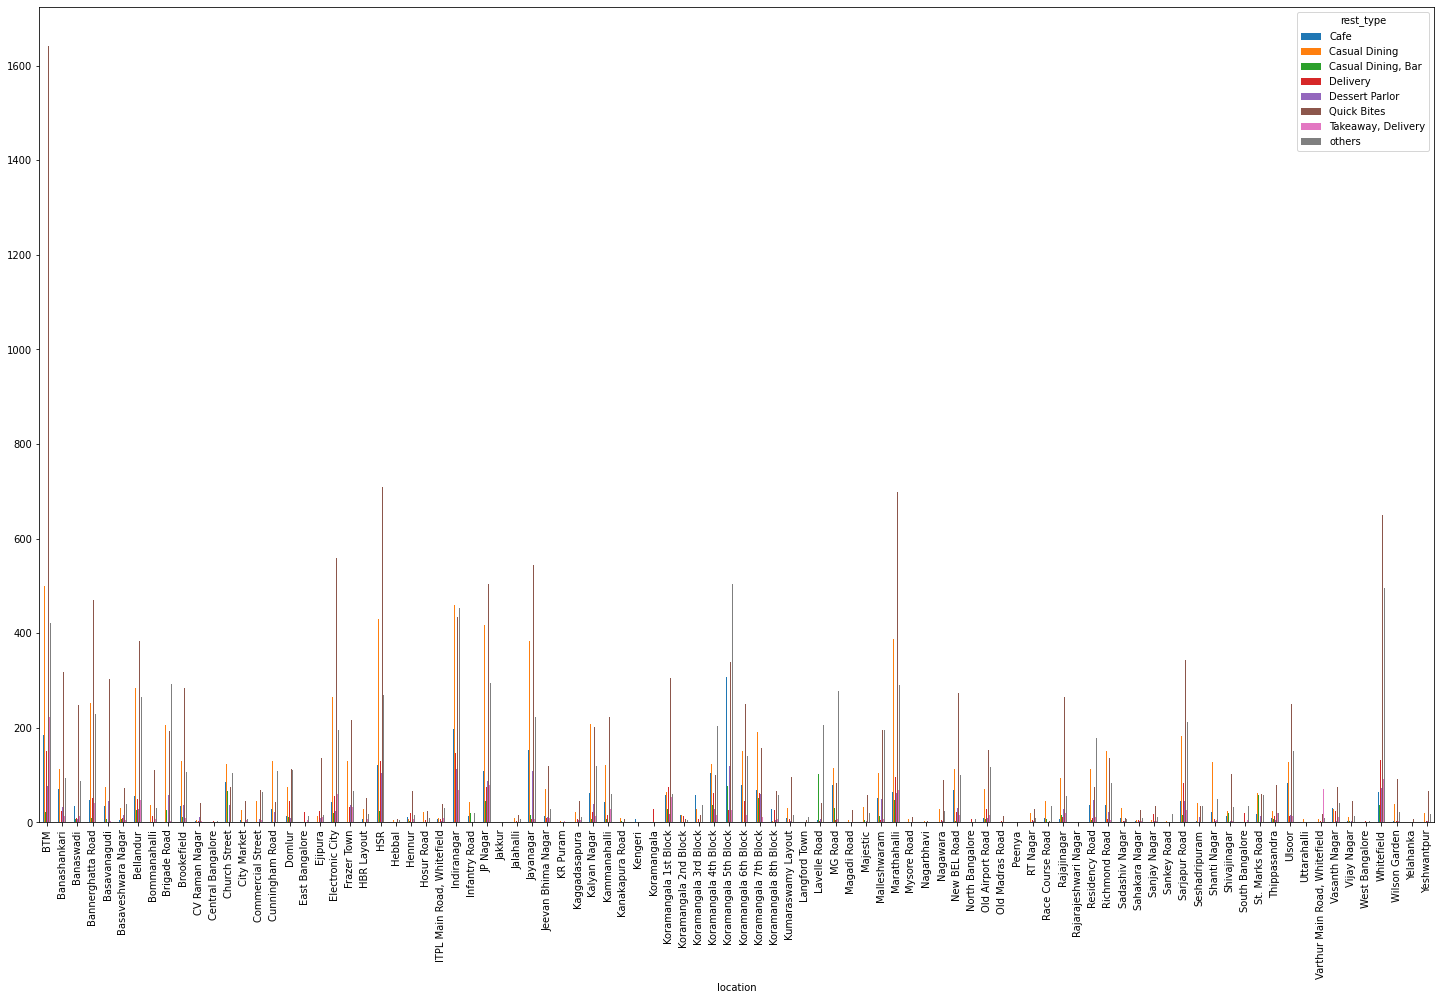

In [354]:
resurent_type_by_location = data.groupby(['location', 'rest_type']).size().unstack('rest_type', fill_value=0)
resurent_type_by_location.plot(kind='bar', figsize=(25, 15))
plt.show()

In [355]:
data.online_order[data.online_order == 'Yes'] = 1
data.online_order[data.online_order == 'No'] =  0
data.online_order.value_counts()

1    25015
0    14188
Name: online_order, dtype: int64

In [356]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.location = le.fit_transform(data.location)
data.rest_type = le.fit_transform(data.rest_type)
data.cuisines = le.fit_transform(data.cuisines)
data.menu_item = le.fit_transform(data.menu_item)
data.book_table = le.fit_transform(data.book_table)
data.head(n=2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),latitude,longitude
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,1,53,800.0,9088,Buffet,12.965283,77.594452
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,1,53,800.0,9088,Buffet,12.965283,77.594452


In [357]:
my_data = data.iloc[:,[2,3,4,5,6,7,9,10,11]]

my_data.to_csv('Zomato_df.csv')

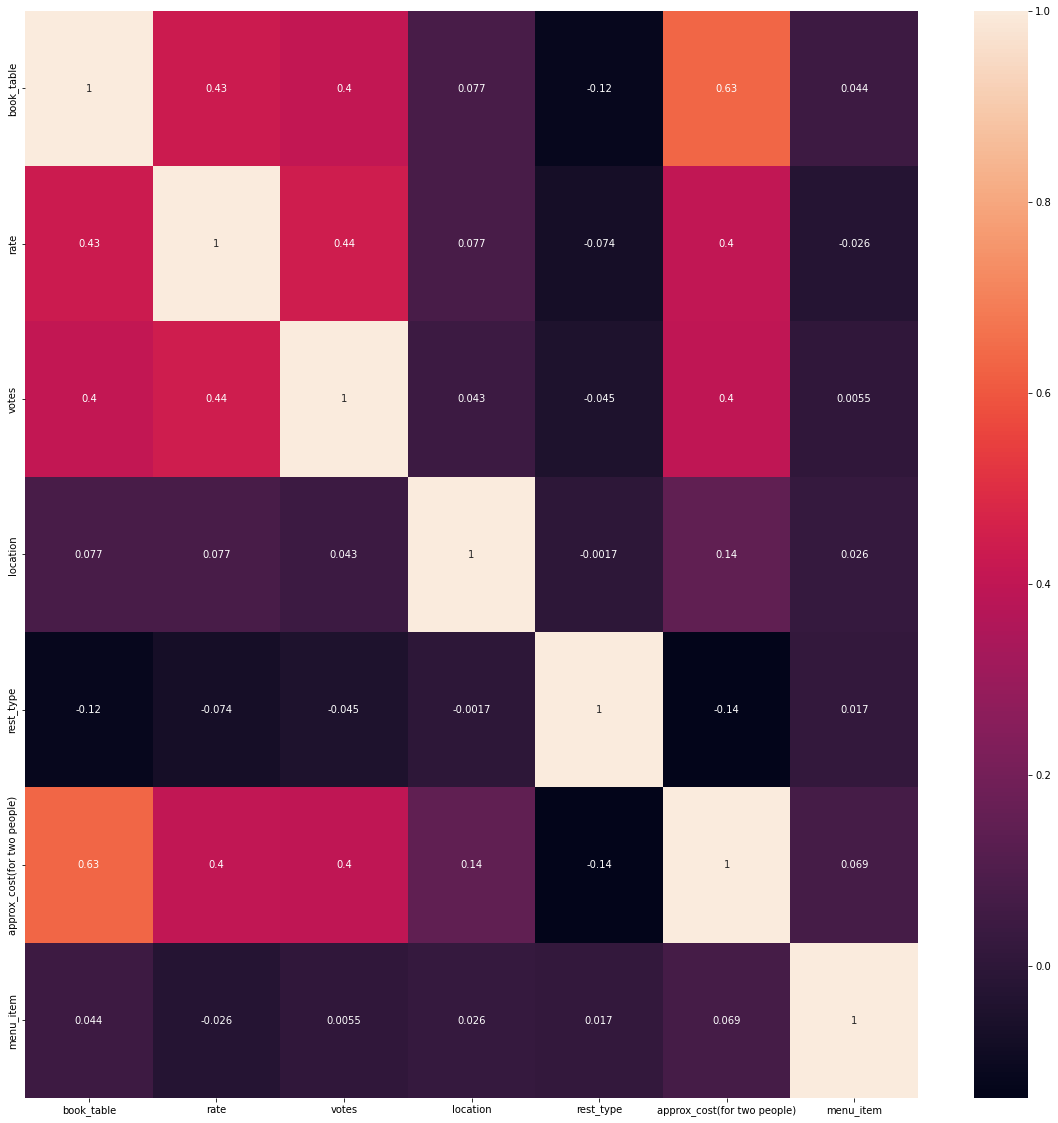

In [358]:
plt.figure(figsize = (20,20))
sns.heatmap(my_data.corr(), annot = True)
plt.show()